Data preparation and Visualization : (Graded out of 100)
1.  You must perform appropriate EDA on your dataset, rationalizing and detailing why you chose the specific methods and what insight you gained. [0-20]

2.      You must also rationalise justify and detail all the methods used to prepare the data for ML. [0-30]
3.      Appropriate visualizations must be used to engender insight into the dataset and to illustrate your final insights gained in your analysis. [0-20]
4.      All design and implementation of your visualizations must be justified and detailed in full., making reference to Tufts Principles [0-30]


In [1]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Importing the dataset

In [2]:
# Load migration data.csv file into dataframe (df)
df = pd.read_csv('Migration data.csv')

# Display first 5 records
df.head()

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [3]:
df.tail(5) 

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
1993,Estimated Migration (Persons in April),2023,65 years and over,Male,Emigrants: All destinations,Thousand,0.4
1994,Estimated Migration (Persons in April),2023,65 years and over,Male,Immigrants: All origins,Thousand,1.5
1995,Estimated Migration (Persons in April),2023,65 years and over,Female,Net migration,Thousand,1.8
1996,Estimated Migration (Persons in April),2023,65 years and over,Female,Emigrants: All destinations,Thousand,0.6
1997,Estimated Migration (Persons in April),2023,65 years and over,Female,Immigrants: All origins,Thousand,2.5


In [4]:
df.dtypes

STATISTIC Label            object
Year                        int64
Age Group                  object
Sex                        object
Inward or Outward Flow     object
UNIT                       object
VALUE                     float64
dtype: object

In [8]:
df = df.drop(["STATISTIC Label"], axis=1)
df.head(5)

,Year,Age Group,Sex,Inward or Outward Flow,VALUE
0,1987,All ages,Both sexes,Net migration,-23.0
1,1987,All ages,Both sexes,Emigrants: All destinations,40.2
2,1987,All ages,Both sexes,Immigrants: All origins,17.2
3,1987,All ages,Male,Net migration,NaN
4,1987,All ages,Male,Emigrants: All destinations,NaN


In [ ]:
df = df.drop(["UNIT"], axis=1)

In [9]:
df.shape

(1998, 5)

In [10]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 5)


In [11]:
df.count() 

Year                      1998
Age Group                 1998
Sex                       1998
Inward or Outward Flow    1998
VALUE                     1683
dtype: int64

In [12]:
print(df.isnull().sum())

Year                        0
Age Group                   0
Sex                         0
Inward or Outward Flow      0
VALUE                     315
dtype: int64


In [23]:
df = df.dropna() 
df.count()

Year                      1683
Age Group                 1683
Sex                       1683
Inward or Outward Flow    1683
VALUE                     1683
dtype: int64

<Axes: xlabel='Year'>

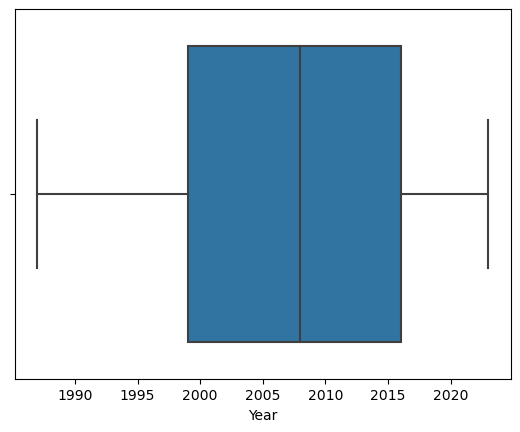

In [24]:
import seaborn as snsYear                        
sns.boxplot(x=df["Year"])

In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Year     17.0
VALUE    12.8
dtype: float64


In [26]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [27]:
df.shape

(1520, 5)

In [30]:
df = df.rename(columns={"Inward or Outward Flow": "FlowofPeople"})

<Axes: >

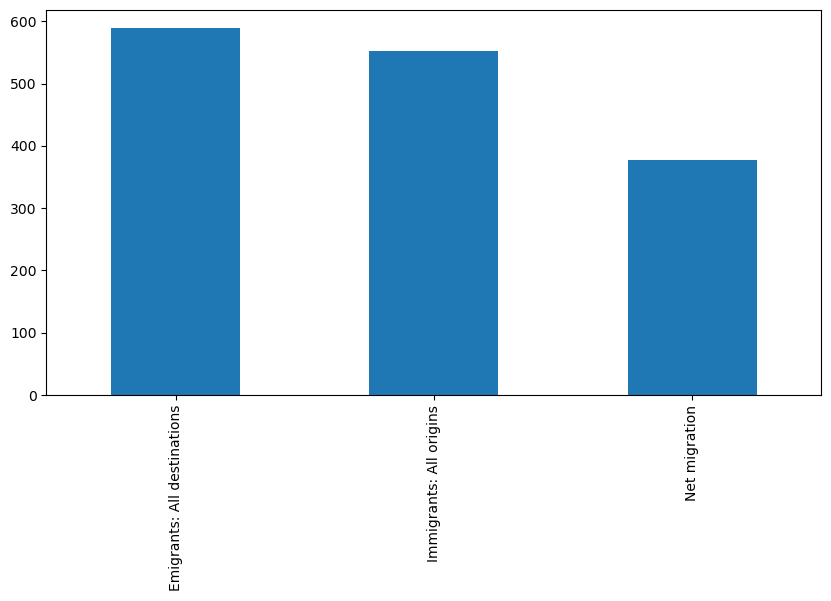

In [31]:
df.FlowofPeople.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))

<Axes: >

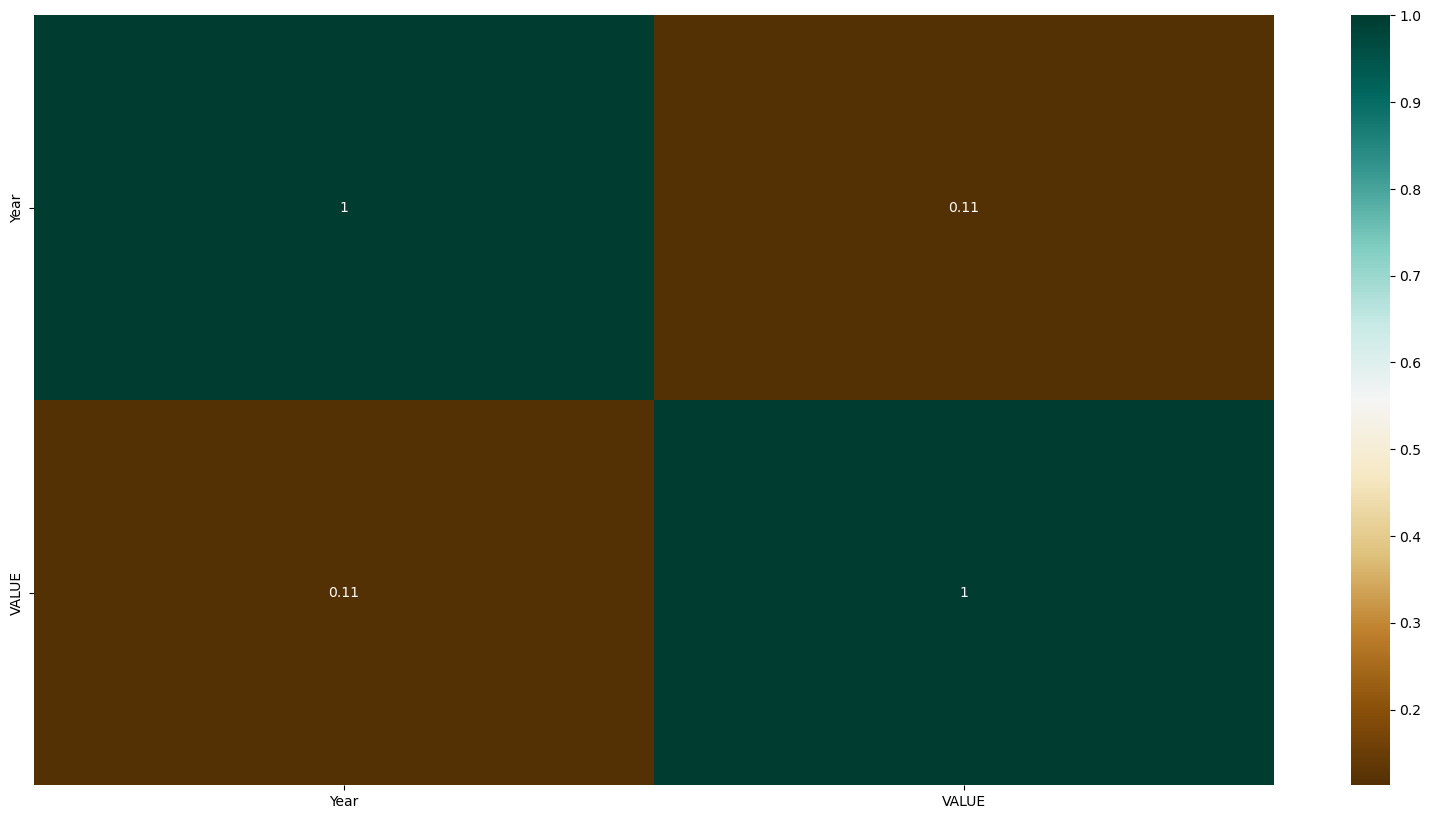

In [32]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)